# problem statement:
    this dataset utilizes data from 2014 major league baseball seasons in order to deveop an algorithm that predicts the number of
    wins for a given team in the 2015.season based on several different indicators of success.there are 16 different features that
    will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

# Input features:
    Runs,atbats,hits,doubles,triples,Homeruns,walks,strikeouts,stolen bases,Runs allowed,Earned Runs,Earned Run Average(ERA),Shutouts,saves,complete Games and Errors

# Output Module:
    Number of predicted wins(W)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore') 

# imported basic library

In [2]:
df_baseball=pd.read_csv('baseball.csv')
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# dataset has loaded and displaying the data

In [3]:
df_baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df_baseball.shape # checking data dimensions

(30, 17)

In [5]:
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df_baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# by checking null values,no null values in dataset

<AxesSubplot:>

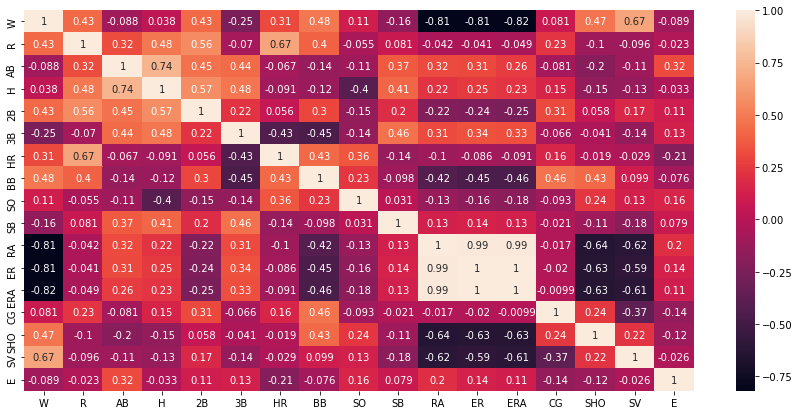

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(df_baseball.corr(),annot=True)

# correlation heatmap is displayed, some features are highly correlated and some are less.

In [9]:
print(df_baseball.skew())
print("Total count of numeric features:",len(df_baseball.skew()))

print("count of features which are significantly skewed: ",len(df_baseball.skew().loc[abs(df_baseball.skew())>0.5]))

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64
Total count of numeric features: 17
count of features which are significantly skewed:  7


# there are 17 Numeric features and 7 skewed feature are present

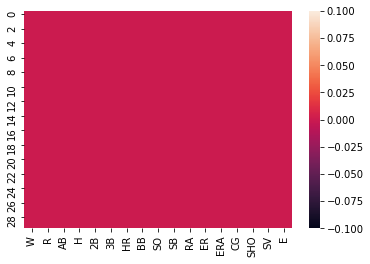

In [13]:
sns.heatmap(df_baseball.isnull())
plt.show()

# statistical summary

In [14]:
df_baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# data analysis

In [15]:
corr=df_baseball.corr()

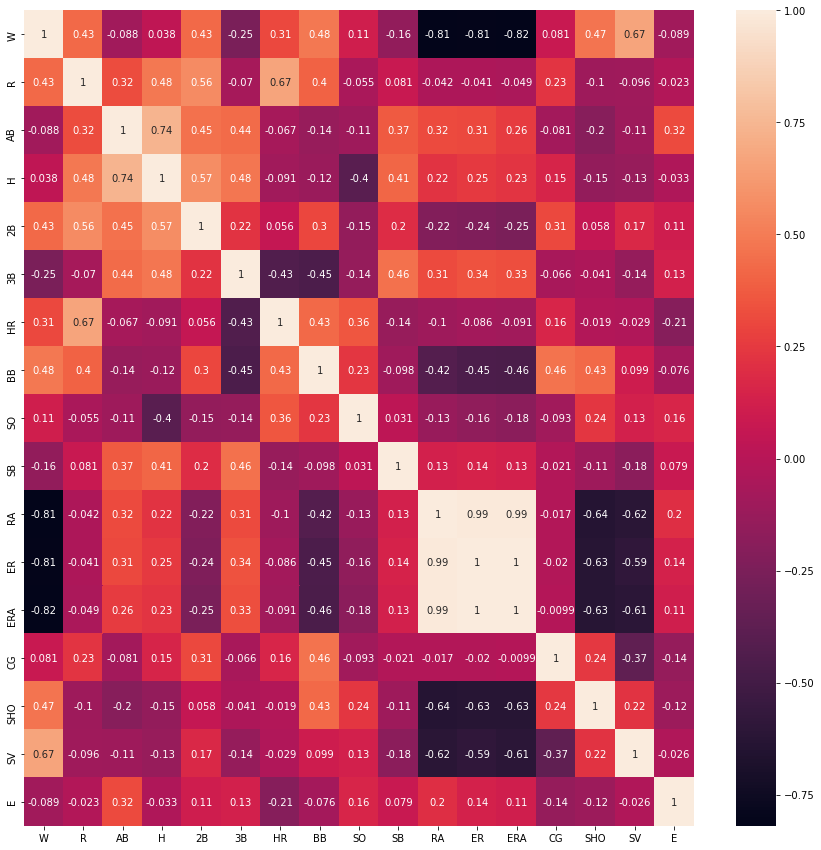

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [17]:
corr['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

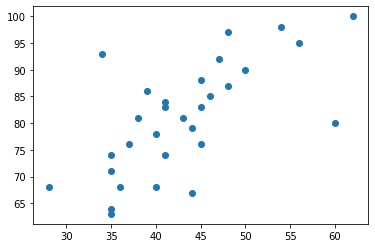

In [19]:
plt.scatter(x='SV',y='W',data=df_baseball)
plt.show()

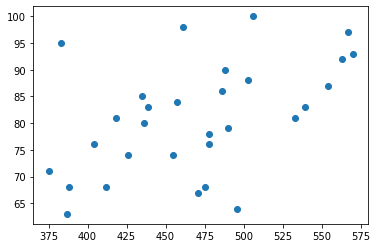

In [20]:
plt.scatter(x='BB',y='W',data=df_baseball)
plt.show()

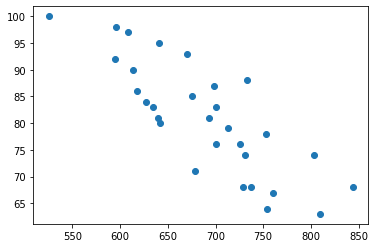

In [21]:
plt.scatter(x='RA',y='W',data=df_baseball)
plt.show()

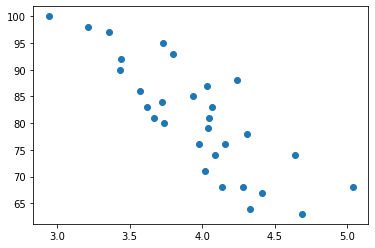

In [22]:
plt.scatter(x='ERA',y='W',data=df_baseball)
plt.show()

In [23]:
x=df_baseball.drop('W',axis=1)
y=df_baseball['W']

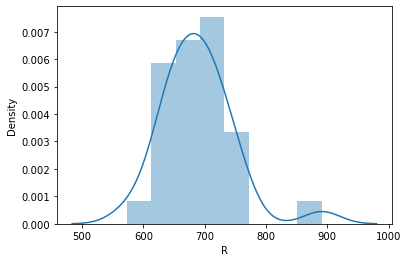

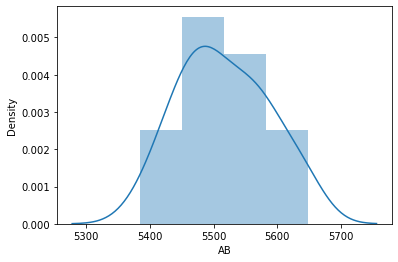

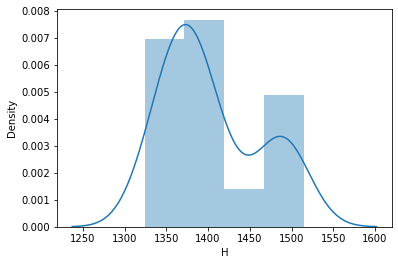

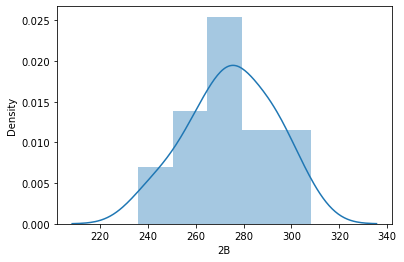

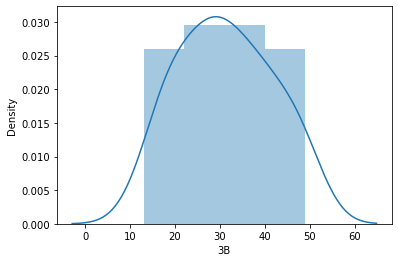

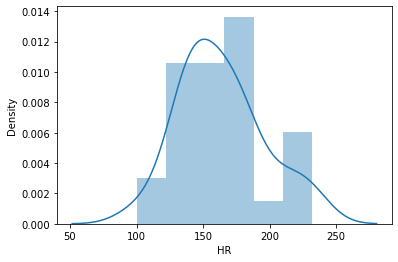

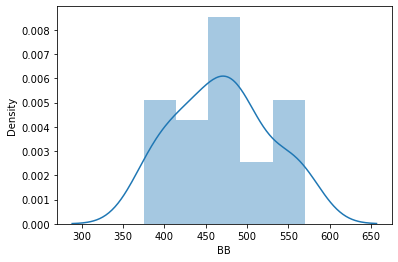

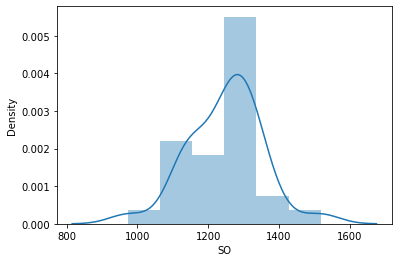

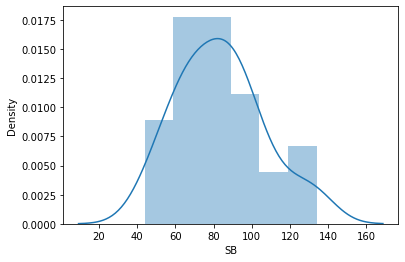

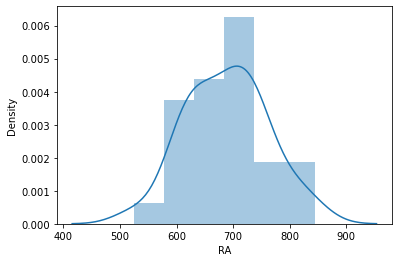

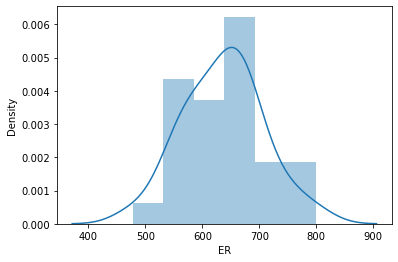

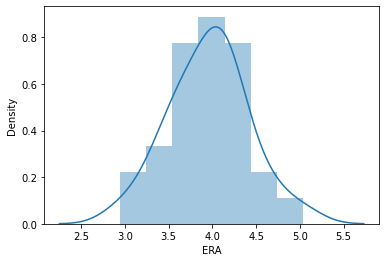

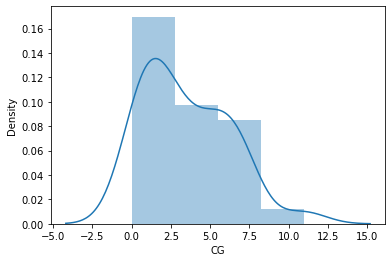

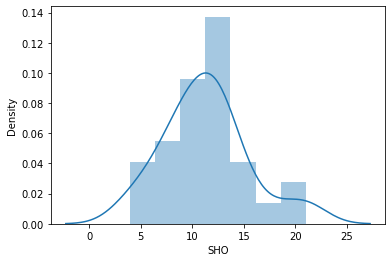

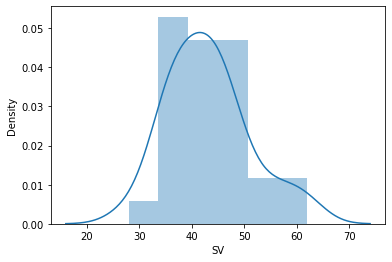

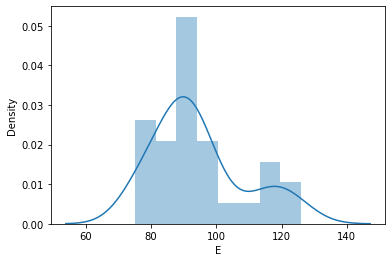

In [27]:
for i in x.describe().columns:
    sns.distplot(x[i].dropna())
    plt.show()

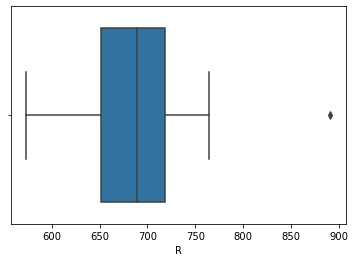

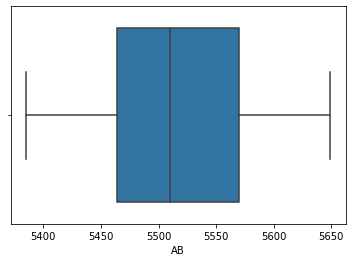

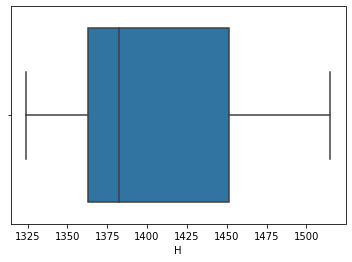

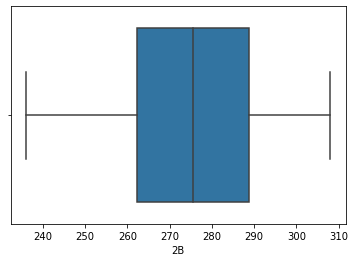

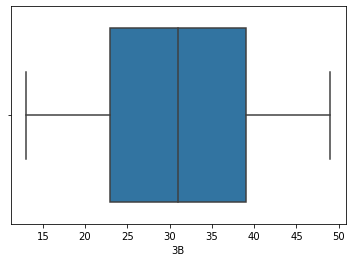

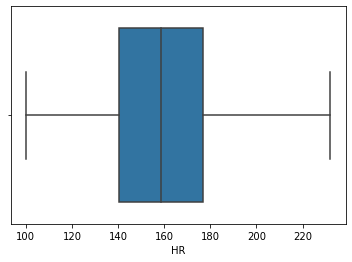

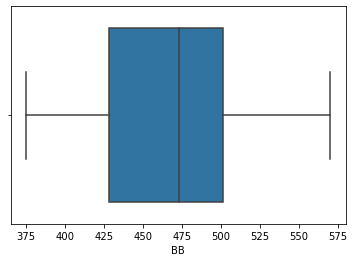

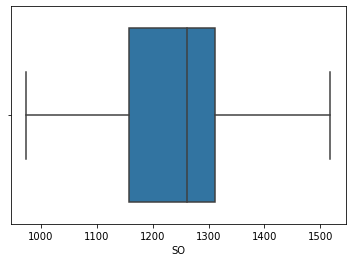

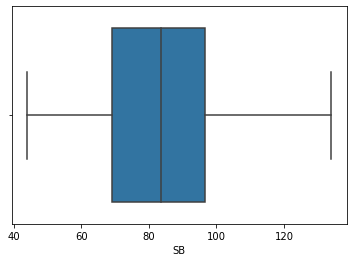

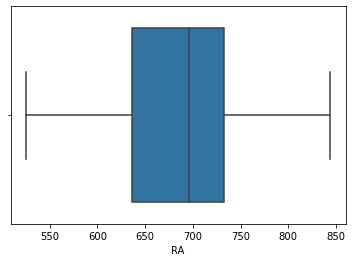

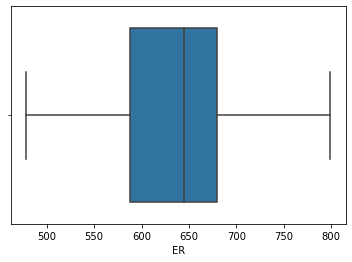

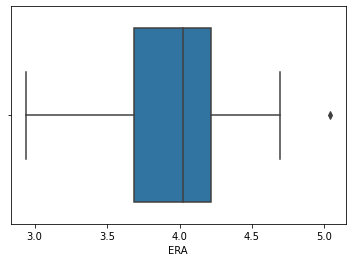

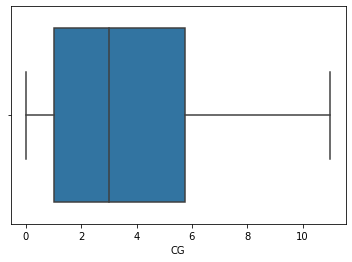

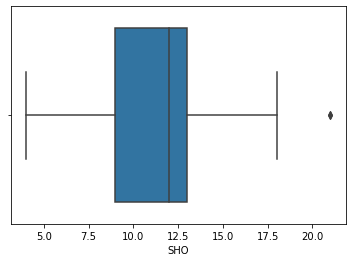

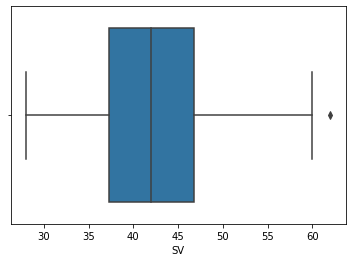

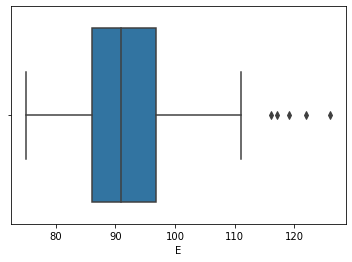

In [28]:
for i in x.describe().columns:
    sns.boxplot(x[i].dropna())
    plt.show()

# now, we should check for best random state.

In [30]:
le=LinearRegression()

In [31]:
maxAcc=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('best r2_score:',maxAcc,'with random_state:',maxRS)

best r2_score: 0.8603360666735207 with random_state: 34


splitting the data

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [34]:
dr=DecisionTreeRegressor()
sv=SVR()
rf=RandomForestRegressor()model=[le,dr,sv,rf]

In [35]:
model=[le,dr,sv,rf]

In [36]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predv))
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

r2_score of LinearRegression() is:
0.8603360666735207
mean_squared_error: 17.704558856744313
mean_absolute_error: 2.868884467040006
root_mean_squared_error 4.207678559104095


r2_score of DecisionTreeRegressor() is:
0.432021815348656
mean_squared_error: 72.0
mean_absolute_error: 7.555555555555555
root_mean_squared_error 8.48528137423857


r2_score of SVR() is:
-0.0231322330187278
mean_squared_error: 129.6977996127938
mean_absolute_error: 9.18004861054236
root_mean_squared_error 11.38849417670281


r2_score of RandomForestRegressor() is:
0.4831881476431633
mean_squared_error: 65.51387777777776
mean_absolute_error: 6.863333333333333
root_mean_squared_error 8.09406435468472




In [37]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [38]:
ls=ElasticNet(alpha=10)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predis=ls.predict(x_test)
print(r2_score(y_test,predis))
print('mean_squared_error:',mean_squared_error(y_test,predis))
print('mean_absolute_error:',mean_absolute_error(y_test,predis))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predis)))

0.8559470333126209
mean_squared_error: 18.260936567234676
mean_absolute_error: 3.0756909486977424
root_mean_squared_error 4.273281709323021


In [39]:
lt=Lasso(alpha=0.001)
lt.fit(x_train,y_train)
lt.score(x_train,y_train)
predi=ls.predict(x_test)
print(r2_score(y_test,predi))
print('mean_squared_error:',mean_squared_error(y_test,predi))
print('mean_absolute_error:',mean_absolute_error(y_test,predi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predi)))

0.8559470333126209
mean_squared_error: 18.260936567234676
mean_absolute_error: 3.0756909486977424
root_mean_squared_error 4.273281709323021


In [40]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pedi=rd.predict(x_test)
print(r2_score(y_test,pedi))
print('mean_squared_error:',mean_squared_error(y_test,pedi))
print('mean_absolute_error:',mean_absolute_error(y_test,pedi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,pedi)))

0.8502544758080072
mean_squared_error: 18.982556079054103
mean_absolute_error: 3.090090585894375
root_mean_squared_error 4.356897529097294


# saving the model

In [41]:
import joblib

In [44]:
joblib.dump(ls,'baseball.obj')

['baseball.obj']